<a href="https://colab.research.google.com/github/geoUFSC/geostats/blob/main/PermissibleModels_TheoVariogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Variogramas teóricos

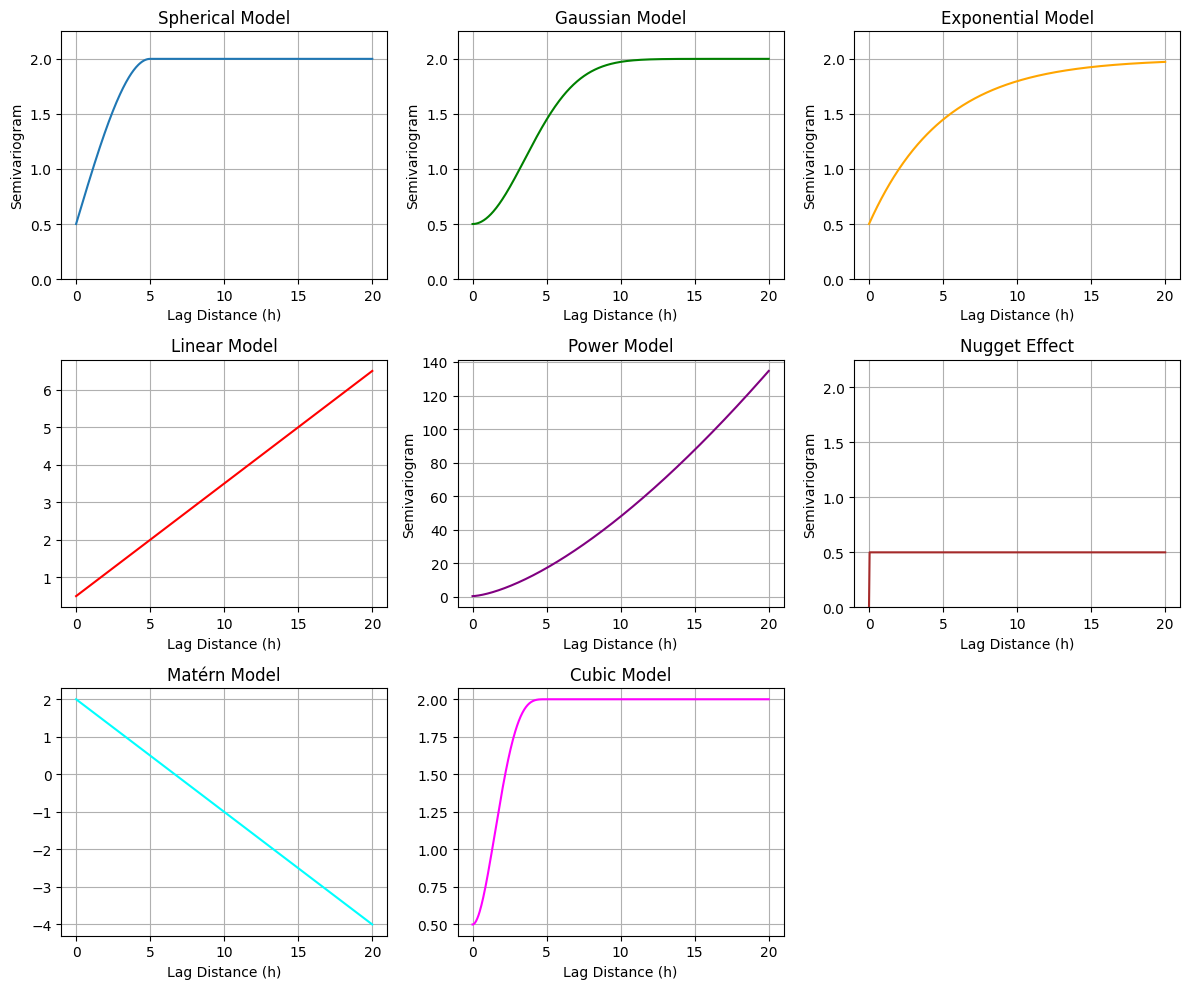

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Define the range of lag distances (h)
h = np.linspace(0, 20, 500)

# Parameters for the models
n_nugg = 0.5  # Nugget
s_sill = 1.5   # Partial sill
a = 5     # Range
n = 1.5   # Power model exponent
nu = 1.0  # Smoothness parameter for Matérn model

# Spherical model
def spherical_model(h, n_nugg, s_sill, a):
    return np.where(h <= a, n_nugg + s_sill * (3 * h / (2 * a) - 0.5 * (h / a)**3), n_nugg + s_sill)

# Exponential model
def exponential_model(h, n_nugg, s_sill, a):
    return n_nugg + s_sill * (1 - np.exp(-h / a))

# Gaussian model
def gaussian_model(h, n_nugg, s_sill, a):
    return n_nugg + s_sill * (1 - np.exp(-(h / a)**2))

# Linear model
def linear_model(h, n_nugg, k):
    return n_nugg + k * h

# Power model
def power_model(h, n_nugg, s_sill, n):
    return n_nugg + s_sill * h**n

# Nugget effect
def nugget_effect(h, n_nugg):
    return np.where(h == 0, 0, n_nugg) #if h==0 then 0 else n_nugg
    #np.full_like(h, n_nugg)  #return np.where(h == 0, n_nugg, 0)

# Matérn model (approximate since Bessel function is complex to calculate)
def matern_model(h, n_nugg, s_sill, a, nu):
    return n_nugg + s_sill * (1 - (1/(2**(nu-1) * math.gamma(nu))) * ((h/a)**nu))

# Cubic model
def cubic_model(h, n_nugg, s_sill, a):
    return np.where(h <= a, n_nugg + s_sill * (7 * (h/a)**2 - 8.75 * (h/a)**3 + 3.5 * (h/a)**5 - 0.75 * (h/a)**7), n_nugg + s_sill)

# Plot all models
plt.figure(figsize=(12, 10))

# Spherical
plt.subplot(3, 3, 1)
plt.plot(h, spherical_model(h, n_nugg, s_sill, a), label='Spherical')
plt.ylim(0, 2.25)
plt.title('Spherical Model')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariogram')
plt.grid(True)

# Gaussian
plt.subplot(3, 3, 2)
plt.plot(h, gaussian_model(h, n_nugg, s_sill, a), label='Gaussian', color='green')
plt.ylim(0, 2.25)
plt.title('Gaussian Model')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariogram')
plt.grid(True)

# Exponential
plt.subplot(3, 3, 3)
plt.plot(h, exponential_model(h, n_nugg, s_sill, a), label='Exponential', color='orange')
plt.ylim(0, 2.25)
plt.title('Exponential Model')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariogram')
plt.grid(True)

# Linear
plt.subplot(3, 3, 4)
plt.plot(h, linear_model(h, n_nugg, 0.3), label='Linear', color='red')
plt.title('Linear Model')
plt.xlabel('Lag Distance (h)')
plt.grid(True)

# Power
plt.subplot(3, 3, 5)
plt.plot(h, power_model(h, n_nugg, s_sill, n), label='Power', color='purple')
plt.title('Power Model')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariogram')
plt.grid(True)

# Nugget Effect
plt.subplot(3, 3, 6)
plt.plot(h, nugget_effect(h, n_nugg), label='Nugget', color='brown')
plt.ylim(0, 2.25)
plt.title('Nugget Effect')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariogram')
plt.grid(True)

# Matérn (approximated)
plt.subplot(3, 3, 7)
plt.plot(h, matern_model(h, n_nugg, s_sill, a, nu), label='Matérn', color='cyan')
plt.title('Matérn Model')
plt.xlabel('Lag Distance (h)')
plt.grid(True)

# Cubic
plt.subplot(3, 3, 8)
plt.plot(h, cubic_model(h, n_nugg, s_sill, a), label='Cubic', color='magenta')
plt.title('Cubic Model')
plt.xlabel('Lag Distance (h)')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

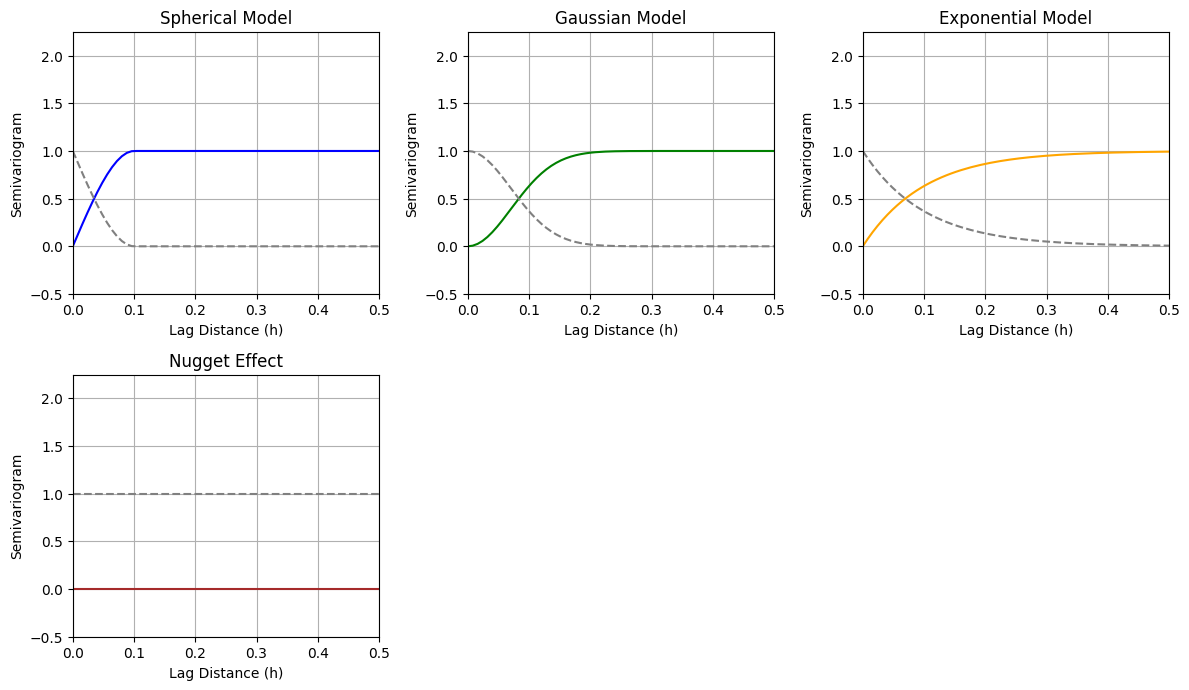

In [ ]:
#Covariance functions + semivariogram functions

import numpy as np
import matplotlib.pyplot as plt

# Define the range of lag distances (h)
h = np.linspace(0, 4, 500)

# Parameters for the models
n_nugg = 0     # Nugget
s_sill = 1     # Partial sill
a = 0.1        # Range

# Spherical model
def spherical_model(h, n_nugg, s_sill, a):
    return np.where(h <= a, n_nugg + s_sill * (3 * h / (2 * a) - 0.5 * (h / a)**3), n_nugg + s_sill)

# Exponential model
def exponential_model(h, n_nugg, s_sill, a):
    return n_nugg + s_sill * (1 - np.exp(-h / a))

# Gaussian model
def gaussian_model(h, n_nugg, s_sill, a):
    return n_nugg + s_sill * (1 - np.exp(-(h / a)**2))

# Nugget effect
def nugget_effect(h, n_nugg):
    return np.where(h == 0, 0, n_nugg)


# Plot all models
plt.figure(figsize=(12, 10))

# Spherical
plt.subplot(3, 3, 1)
plt.plot(h, spherical_model(h, n_nugg, s_sill, a), label='Spherical', color='b')
plt.ylim(-0.5, 2.25)
plt.xlim(0, 0.5)
plt.title('Spherical Model')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariogram')
plt.grid(True)
#plot covariance function (dashed line)
plt.plot(h, n_nugg + s_sill - spherical_model(h, n_nugg, s_sill, a), '--', label='Covariance', color='grey')
#plt.legend()

# Gaussian
plt.subplot(3, 3, 2)
plt.plot(h, gaussian_model(h, n_nugg, s_sill, a), label='Gaussian', color='green')
plt.ylim(-0.5, 2.25)
plt.xlim(0, 0.5)
plt.title('Gaussian Model')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariogram')
plt.grid(True)
#plot covariance function (dashed line)
plt.plot(h, n_nugg + s_sill - gaussian_model(h, n_nugg, s_sill, a), '--', label='Covariance', color='grey')
#plt.legend()

# Exponential
plt.subplot(3, 3, 3)
plt.plot(h, exponential_model(h, n_nugg, s_sill, a), label='Exponential', color='orange')
plt.ylim(-0.5, 2.25)
plt.xlim(0, 0.5)
plt.title('Exponential Model')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariogram')
plt.grid(True)
#plot covariance function (dashed line)
plt.plot(h, n_nugg + s_sill - exponential_model(h, n_nugg, s_sill, a), '--', label='Covariance', color='grey')
#plt.legend()

# Nugget Effect
plt.subplot(3, 3, 4)
plt.plot(h, nugget_effect(h, n_nugg), label='Nugget', color='brown')
plt.ylim(-0.5, 2.25)
plt.xlim(0, 0.5)
plt.title('Nugget Effect')
plt.xlabel('Lag Distance (h)')
plt.ylabel('Semivariogram')
plt.grid(True)
#plot covariance function (dashed line)
plt.plot(h, s_sill - nugget_effect(h, n_nugg), '--', label='Covariance', color='grey')
#plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()



